In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import uproot
import matplotlib
from scipy import optimize
import seaborn as sns; sns.set()
%matplotlib inline
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'axes.labelsize'    : 19,
          'xtick.labelsize'   : 16,
          'ytick.labelsize'   : 16,
          'figure.titlesize'  : 20,
          'figure.figsize'    : (8, 8),
          'legend.fontsize'   : 18,
          'legend.numpoints'  : 1,
          'font.serif': 'Arial'
          }
matplotlib.rcParams.update(params)
import matplotlib.pyplot as plt
from root_pandas import read_root

Welcome to JupyROOT 6.19/01


In [2]:
d = pd.read_csv("BetaCell_matrix.csv") 
d2 = pd.read_csv("BetaCell_annotation_metadata.csv") 

In [3]:
d['dpt_pseudotime'] = d2['dpt_pseudotime']

In [4]:
df = d.sort_values("dpt_pseudotime")
df

,index,ACVR1C,AHI1,AKAP9,ALCAM,AMN,ASIC2,BAZ2B,C1orf127,C9orf3,...,ZNF385D,ZNF804A,LINC00486,ZNF385D-AS2,LINC01098,AC107218.3,RP11-136K7.2,RP11-125B21.2,CTD-2277K2.1,dpt_pseudotime
1143,L1_AGCTCTCGTCTAGGTT,2.708424,3.091425,3.367682,0.000000,0.0,2.079792,3.091425,0.000000,0.000000,...,2.079792,0.000000,4.159277,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.000000
1286,L2_CAGTCCTGTAATCGTC,2.123909,2.755413,2.123909,3.416253,0.0,0.000000,2.123909,0.000000,0.000000,...,3.139456,0.000000,4.406737,0.0,0.0000,0.000000,2.123909,2.123909,0.0,0.019512
1135,L1_ACCCACTAGCAAATCA,2.453329,1.842690,2.453329,0.000000,0.0,0.000000,3.102521,0.000000,1.842690,...,0.000000,0.000000,4.571023,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.027798
1296,L2_CGACTTCTCAACACCA,1.822840,2.431754,2.431754,3.079966,0.0,1.822840,1.822840,0.000000,0.000000,...,2.431754,0.000000,4.431181,0.0,0.0000,0.000000,3.293875,3.079966,0.0,0.035409
1350,L2_GTACGTATCACCTCGT,1.642900,2.234337,3.258898,2.234337,0.0,2.603462,2.872466,0.000000,2.872466,...,1.642900,2.234337,4.803481,0.0,1.6429,0.000000,1.642900,1.642900,0.0,0.038008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,CAACCAAGTCAGCTAT_15,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.927119
75,TTTCCTCGTCCAACTA_17,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.939410
806,CCATGTCTCTAACTGG_10,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.857561,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.952788
839,AGGCCGTTCGCCAGCA_18,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.0,0.977516


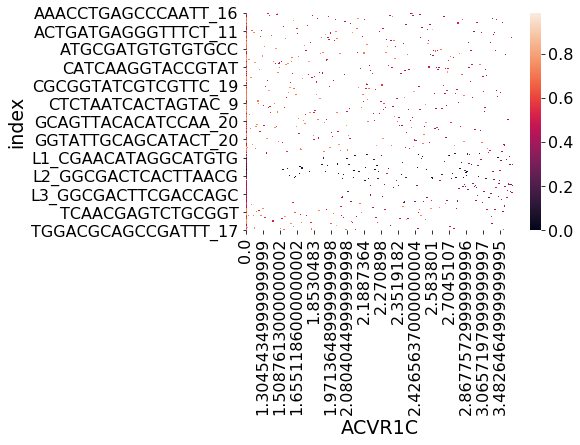

In [5]:
df = df.pivot("index", "ACVR1C", "dpt_pseudotime")
ax = sns.heatmap(df)